<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Real_world_PAPID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparison between PID, APID and PAPID and others optimizers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import operator 
import math

In [2]:
df = pd.read_csv('/content/hour.csv')

In [3]:
df_new = df[df.cnt < 500]

In [4]:
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min)/(max - min) for i in x])

In [5]:
x = df_new['temp']
y = scale(df_new.cnt)

In [6]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    
    plt.figure(figsize=(20,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontSize=14)
    plt.xlabel('temp', fontSize=11)
    plt.ylabel('cnt', fontSize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

#PID

In [7]:
def PID_Otimizer(X, y, lr=0.01, epoch=10, Kd=0.9):

  mome_para = 0.9 # momentum factor
  #Kd = 0.25*lr + 0.5 + (1 + (16/5)* (3.14)**2) / lr #Calculating the hyperparameter Kd

  m, b = 0.5, 0.5 # parameters
  log, mse = [], [] # lists to store learning process
  N = len(X) # number of samples

  vm, dt_m, vb, dt_b = 0,0,0,0 
  grad_m, grad_b, prev_grad_m,prev_grad_b= 0,0,0,0


  prev_update_b = 0
  prev_update_m = 0
  prev_update_dt_m = 0
  prev_update_dt_b = 0
    
  for _ in range(epoch):
    f = y - (m*X + b)

    # Updating m and b
    grad_m = (-2 * (X*f).sum() / N)
    grad_b = (-2 * f.sum() / N)

    vm = mome_para*prev_update_m + lr * grad_m
    dt_m = mome_para*prev_update_dt_m + (1 - mome_para) * (grad_m - prev_grad_m)

    vb = mome_para*prev_update_b + lr * grad_b
    dt_b = mome_para*prev_update_dt_b + (1 - mome_para)* (grad_b - prev_grad_b)

    prev_grad_m = grad_m
    prev_gard_b = grad_b

    m = m - vm - Kd*dt_m
    b = b - vb - Kd*dt_b

    prev_update_m = vm
    prev_update_dt_m = dt_m

    prev_update_b = vb
    prev_update_dt_b = dt_b
        
    log.append((m, b))
    mse.append(mean_squared_error(y, (m*X + b)))  

  return m, b, log, mse
 

#APID

In [8]:
def APID(X, y, lr=0.05, epoch=10, Kd=0.9):

  #Kd = 0.25*lr + 0.5 + (1 + (16/5)* (3.14)**2) / lr #Calculating the hyperparameter Kd

  m, b = 0.5, 0.5 # parameters
  log, mse = [], [] # lists to store learning process
  N = len(X) # number of samples
  eps = 1e-8
  gamma = 0.9

  vt_m, dt_m, prev_vt_m, prev_dt_m, mt_m, prev_mt_m = 0,0,0,0,0,0
  vt_b, dt_b, prev_vt_b, prev_dt_b, mt_b, prev_mt_b = 0,0,0,0,0,0
  grad_m, grad_b, prev_grad_m, prev_grad_b= 0,0,0,0


  prev_b = 0
  prev_m = 0
    
  for _ in range(epoch):
    f = y - (m*X + b)

    grad_m = (-2 * (X*f).sum() / N)
    grad_b = (-2 * f.sum() / N)

    mt_m = prev_mt_m + (grad_m**2)
    vt_m = gamma*prev_vt_m + (lr*grad_m)/np.sqrt(mt_m + eps)
    dt_m = gamma*prev_dt_m + (1-gamma)*(grad_m - prev_grad_m)

    prev_mt_m = mt_m
    prev_vt_m = vt_m
    prev_dt_m = dt_m

    mt_b = prev_mt_b + (grad_b**2)
    vt_b = gamma*prev_vt_b + (lr*grad_b)/np.sqrt(mt_b + eps)
    dt_b = gamma*prev_dt_b + (1-gamma)*(grad_b - prev_grad_b)

    prev_mt_b = mt_b
    prev_vt_b = vt_b
    prev_dt_b = dt_b

    prev_grad_m = grad_m
    prev_gard_b = grad_b

    prev_m = m
    prev_b = b

    m = m - vt_m - Kd*dt_m
    b = b - vt_b - Kd*dt_b
        
    log.append((m, b))
    mse.append(mean_squared_error(y, (m*X + b)))  

  return m, b, log, mse

#PAPID

In [9]:
def PAPID(X, y, lr=0.05, epoch=10, Kd=0.9, p=1/4):

  #Kd = 0.25*lr + 0.5 + (1 + (16/5)* (3.14)**2) / lr #Calculating the hyperparameter Kd

  m, b = 0.5, 0.5 # parameters
  log, mse = [], [] # lists to store learning process
  N = len(X) # number of samples
  eps = 1e-8
  gamma = 0.9

  vt_m, dt_m, prev_vt_m, prev_dt_m, mt_m, prev_mt_m = 0,0,0,0,0,0
  vt_b, dt_b, prev_vt_b, prev_dt_b, mt_b, prev_mt_b = 0,0,0,0,0,0
  grad_m, grad_b, prev_grad_m, prev_grad_b= 0,0,0,0


  prev_b = 0
  prev_m = 0
    
  for _ in range(epoch):
    f = y - (m*X + b)

    grad_m = (-2 * (X*f).sum() / N)
    grad_b = (-2 * f.sum() / N)

    mt_m = prev_mt_m + (grad_m**2)
    vt_m = gamma*prev_vt_m + (lr*grad_m)/(mt_m + eps)**p
    dt_m = gamma*prev_dt_m + (1-gamma)*(grad_m - prev_grad_m)

    prev_mt_m = mt_m
    prev_vt_m = vt_m
    prev_dt_m = dt_m

    mt_b = prev_mt_b + (grad_b**2)
    vt_b = gamma*prev_vt_b + (lr*grad_b)/(mt_b + eps)**p
    dt_b = gamma*prev_dt_b + (1-gamma)*(grad_b - prev_grad_b)

    prev_mt_b = mt_b
    prev_vt_b = vt_b
    prev_dt_b = dt_b

    prev_grad_m = grad_m
    prev_gard_b = grad_b

    prev_m = m
    prev_b = b

    m = m - vt_m - Kd*dt_m
    b = b - vt_b - Kd*dt_b
        
    log.append((m, b))
    mse.append(mean_squared_error(y, (m*X + b)))  

  return m, b, log, mse

In [10]:
def Adagrad(X, y, lr=0.05, epoch=10):
    
    m, b = 0.5, 0.5 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
 
    vm,vb =0,0

    eps = 1e-8

    for i in range(epoch):
      dm, db =0,0

      f = y - (m*X + b)
      dm += lr * (-2 * (X*f).sum() / N)
      db +=  lr * (-2 * f.sum() / N)

     
      vm = vm + dm**2
      vb = vb + db**2

      #m = m - (lr/(vm + eps)) * dm
      #b = b - (lr/(vb + eps)) * db

      m = m - (lr/np.sqrt(vm + eps)) * dm
      b = b - (lr/np.sqrt(vb + eps)) * db

      log.append((m, b))
      mse.append(mean_squared_error(y, (m*X + b)))   

    return m, b, log, mse

#Mini-Batch PAPID

In [11]:
def Mini_PAPID(X, y, lr=0.05, epoch=10, Kd=0.9, p=1/4, batch_size=1):

  #Kd = 0.25*lr + 0.5 + (1 + (16/5)* (3.14)**2) / lr #Calculating the hyperparameter Kd

  m, b = 0.5, 0.5 # parameters
  log, mse = [], [] # lists to store learning process
  N = len(X) # number of samples
  eps = 1e-8
  gamma = 0.9

  vt_m, dt_m, prev_vt_m, prev_dt_m, mt_m, prev_mt_m = 0,0,0,0,0,0
  vt_b, dt_b, prev_vt_b, prev_dt_b, mt_b, prev_mt_b = 0,0,0,0,0,0
  grad_m, grad_b, prev_grad_m, prev_grad_b= 0,0,0,0


  prev_b = 0
  prev_m = 0
    
  for _ in range(epoch):

    indexes = np.random.randint(0, len(X), batch_size) # random sample
        
    Xs = np.take(X, indexes)
    ys = np.take(y, indexes)
    N = len(Xs)



    f = ys - (m*Xs + b)

    grad_m = (-2 * (Xs*f).sum() / N)
    grad_b = (-2 * f.sum() / N)

    mt_m = prev_mt_m + (grad_m**2)
    vt_m = gamma*prev_vt_m + (lr*grad_m)/(mt_m + eps)**p
    dt_m = gamma*prev_dt_m + (1-gamma)*(grad_m - prev_grad_m)

    prev_mt_m = mt_m
    prev_vt_m = vt_m
    prev_dt_m = dt_m

    mt_b = prev_mt_b + (grad_b**2)
    vt_b = gamma*prev_vt_b + (lr*grad_b)/(mt_b + eps)**p
    dt_b = gamma*prev_dt_b + (1-gamma)*(grad_b - prev_grad_b)

    prev_mt_b = mt_b
    prev_vt_b = vt_b
    prev_dt_b = dt_b

    prev_grad_m = grad_m
    prev_gard_b = grad_b

    prev_m = m
    prev_b = b

    m = m - vt_m - Kd*dt_m
    b = b - vt_b - Kd*dt_b
        
    log.append((m, b))
    mse.append(mean_squared_error(y, (m*X + b)))  

  return m, b, log, mse

In [12]:
%%time
m, b, log, mse_pid = PID_Otimizer(x, y, 0.01, 500, 10)

CPU times: user 2.29 s, sys: 125 ms, total: 2.41 s
Wall time: 2.47 s


In [13]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.06064215615123751


In [14]:
%%time
m, b, log, mse_apid = APID(x, y, 0.01, 500, 10)

CPU times: user 2.45 s, sys: 151 ms, total: 2.6 s
Wall time: 2.69 s


In [15]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.06073620616684345


In [16]:
%%time
m, b, log, mse_ada = Adagrad(x, y, 0.01, 500)

CPU times: user 2.54 s, sys: 150 ms, total: 2.69 s
Wall time: 2.8 s


In [17]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.06375606883123254


In [102]:
%%time
m, b, log, mse_papid = PAPID(x, y, 0.01, 1000, 10, 1/2)

CPU times: user 4.29 s, sys: 227 ms, total: 4.52 s
Wall time: 4.57 s


In [103]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.060791039927610015


In [104]:
%%time
m, b, log, mse_mini_papid = Mini_PAPID(x, y, 0.01, 1000, 10, 1/2, 500)

CPU times: user 5.23 s, sys: 91 ms, total: 5.32 s
Wall time: 5.36 s


In [105]:
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.06287360683228761


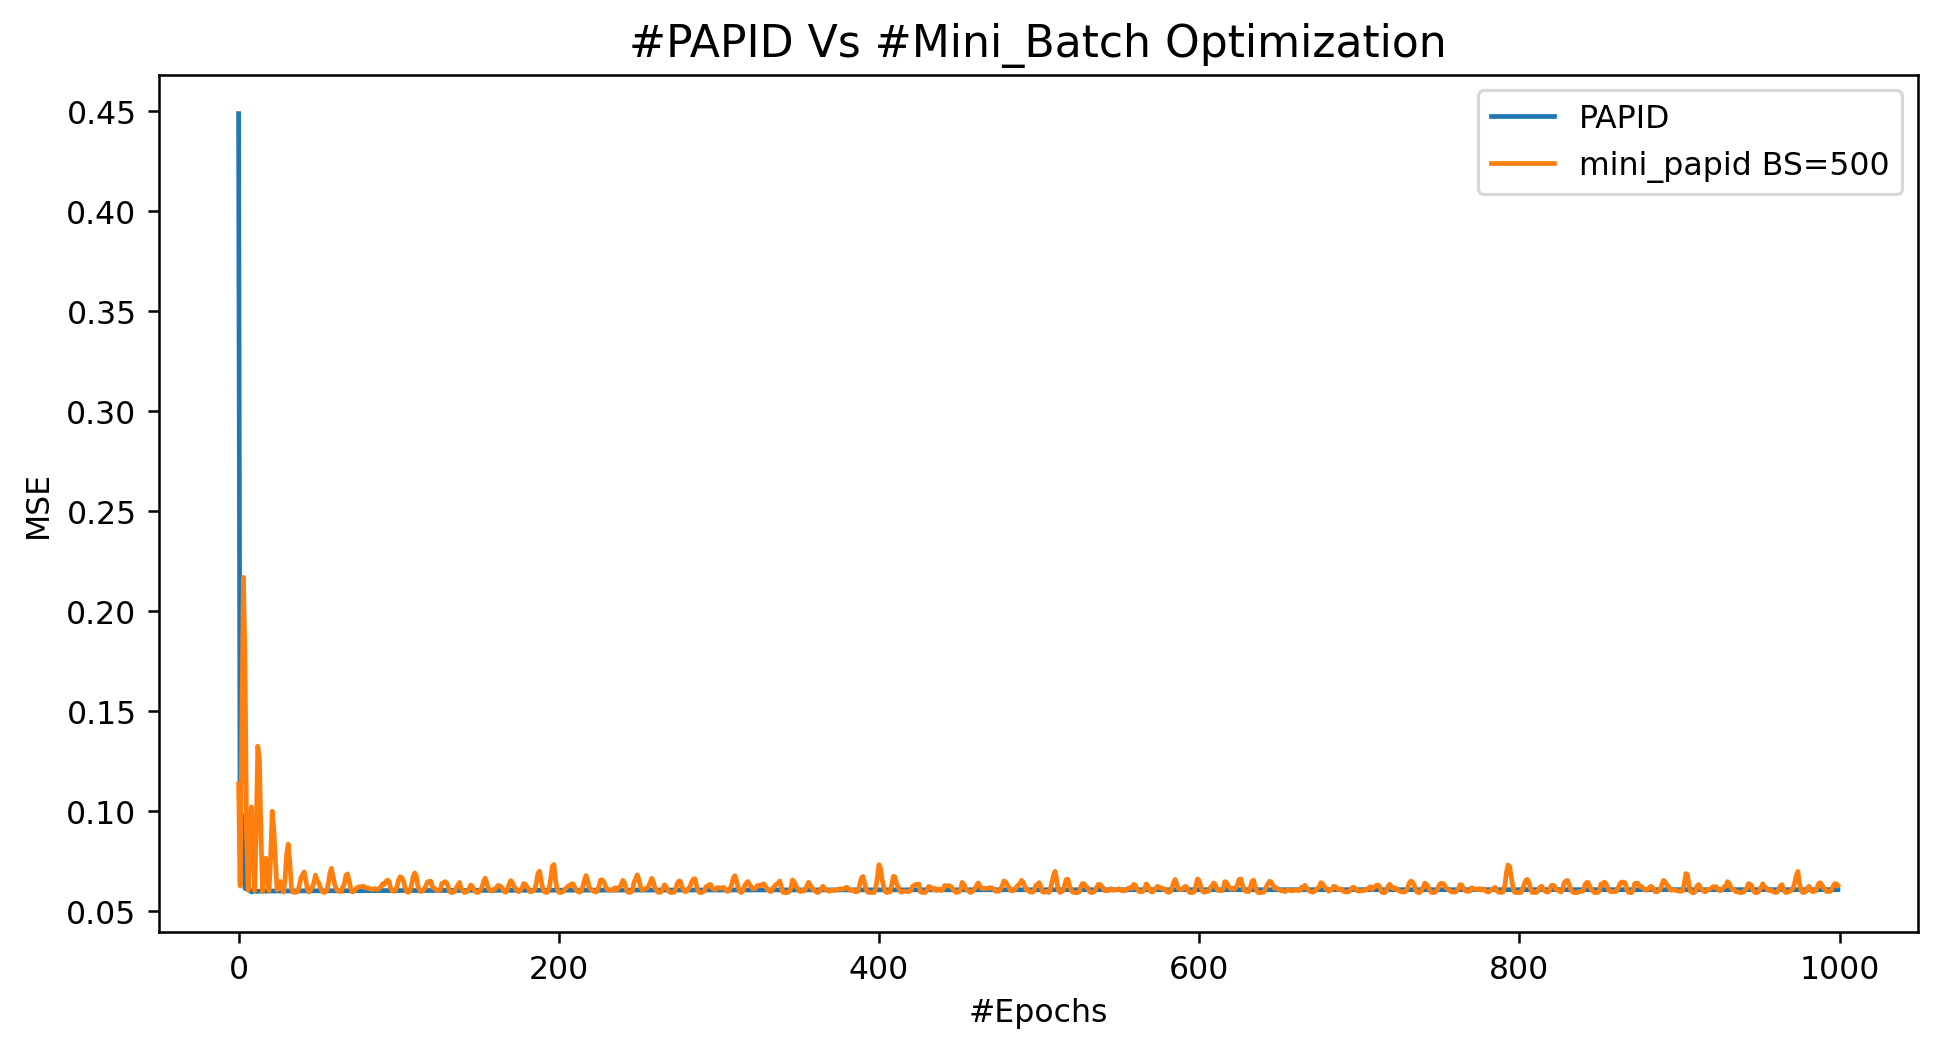

In [106]:
plt.figure(figsize=(10,5))
plt.rcParams['figure.dpi'] = 227
#plt.plot(range(len(mse_pid)), mse_pid, label='PID')
#plt.plot(range(len(mse_apid)), mse_apid, label='APID')
plt.plot(range(len(mse_papid)), mse_papid, label='PAPID')
#plt.plot(range(len(mse_ada)), mse_ada, label='Adagrad')
plt.plot(range(len(mse_mini_papid)), mse_mini_papid, label='mini_papid BS=500')







plt.title('#PAPID Vs #Mini_Batch Optimization', fontSize=14)
plt.xlabel('#Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

#speed test

In [23]:
X1=x
X1 = np.concatenate((X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1))
y1 = np.concatenate((y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y))

In [24]:
%%timeit
PID_Otimizer(X1, y1, 0.01, 500, 10)

1 loop, best of 5: 2.5 s per loop


In [25]:
%%timeit
APID(X1, y1, 0.01, 500, 10)

1 loop, best of 5: 2.57 s per loop


In [26]:
%%timeit
Adagrad(X1, y1, 0.01, 500)

1 loop, best of 5: 2.44 s per loop


In [63]:
%%timeit
PAPID(X1, y1, 0.01, 500, 10, 1/16)

1 loop, best of 5: 2.22 s per loop


In [71]:
%%timeit
Mini_PAPID(X1, y1, 0.01, 500, 10, 1/16, 100)

1 loop, best of 5: 1.09 s per loop
